In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [224]:
df=pd.read_csv("G:\\ML\\japan hotels\\Hostel.csv")

In [225]:
df.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [226]:
df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,342.000000,171.500000,98.871128,1.000000,86.250000,171.500000,256.750000,342.000000
price.from,342.000000,8388.011696,76415.272323,1000.000000,2000.000000,2500.000000,2900.000000,1003200.000000
summary.score,327.000000,8.782569,0.960909,3.100000,8.600000,9.000000,9.400000,10.000000
atmosphere,327.000000,8.238838,1.382002,2.000000,7.800000,8.600000,9.000000,10.000000
cleanliness,327.000000,9.011927,1.215775,2.000000,8.800000,9.300000,9.800000,10.000000
facilities,327.000000,8.597554,1.285356,2.000000,8.000000,9.000000,9.300000,10.000000
location.y,327.000000,8.694801,1.102703,2.000000,8.000000,9.000000,9.400000,10.000000
security,327.000000,8.947401,1.114345,2.000000,8.700000,9.200000,9.600000,10.000000
staff,327.000000,9.133333,1.086513,2.000000,9.000000,9.400000,9.800000,10.000000
valueformoney,327.000000,8.848318,1.047809,4.000000,8.600000,9.000000,9.500000,10.000000


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     342 non-null    int64  
 1   hostel.name    342 non-null    object 
 2   City           342 non-null    object 
 3   price.from     342 non-null    int64  
 4   Distance       342 non-null    object 
 5   summary.score  327 non-null    float64
 6   rating.band    327 non-null    object 
 7   atmosphere     327 non-null    float64
 8   cleanliness    327 non-null    float64
 9   facilities     327 non-null    float64
 10  location.y     327 non-null    float64
 11  security       327 non-null    float64
 12  staff          327 non-null    float64
 13  valueformoney  327 non-null    float64
 14  lon            298 non-null    float64
 15  lat            298 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.9+ KB


In [228]:
df.shape

(342, 16)

In [229]:
df.rename(columns={'hostel.name':'hostel_name','price.from':'price_from','summary.score':'summary_score',
                      'rating.band':'rating_band'},inplace=True)

In [230]:
df.columns

Index(['Unnamed: 0', 'hostel_name', 'City', 'price_from', 'Distance',
       'summary_score', 'rating_band', 'atmosphere', 'cleanliness',
       'facilities', 'location.y', 'security', 'staff', 'valueformoney', 'lon',
       'lat'],
      dtype='object')

In [231]:
df.isna().sum()

Unnamed: 0        0
hostel_name       0
City              0
price_from        0
Distance          0
summary_score    15
rating_band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

In [232]:
data=['summary_score','atmosphere','cleanliness','facilities','security','staff','valueformoney']
for x in data:
    print(f'{x} :',df[x].mean())

summary_score : 8.782568807339446
atmosphere : 8.238837920489303
cleanliness : 9.011926605504584
facilities : 8.59755351681957
security : 8.947400611620795
staff : 9.133333333333336
valueformoney : 8.848318042813453


In [233]:
df['summary_score'].fillna(8.78,inplace=True)
df['atmosphere'].fillna(8.238,inplace=True)
df['cleanliness'].fillna(9.0,inplace=True)
df['facilities'].fillna(8.59,inplace=True)
df['security'].fillna(8.94,inplace=True)
df['staff'].fillna(9.13,inplace=True)
df['valueformoney'].fillna(8.84,inplace=True)

In [234]:
df.isna().sum()

Unnamed: 0        0
hostel_name       0
City              0
price_from        0
Distance          0
summary_score     0
rating_band      15
atmosphere        0
cleanliness       0
facilities        0
location.y       15
security          0
staff             0
valueformoney     0
lon              44
lat              44
dtype: int64

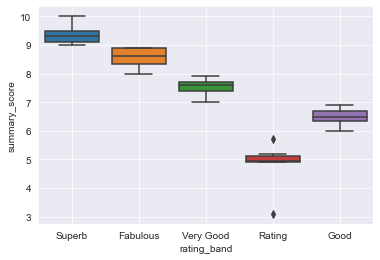

In [235]:
sns.boxplot(x='rating_band',y='summary_score',data=df)
plt.grid(True)

In [236]:
df['rating_band'].fillna('Fabulous',inplace=True)

In [237]:
df['rating_band'].isna().sum()

0

<AxesSubplot:xlabel='rating_band', ylabel='count'>

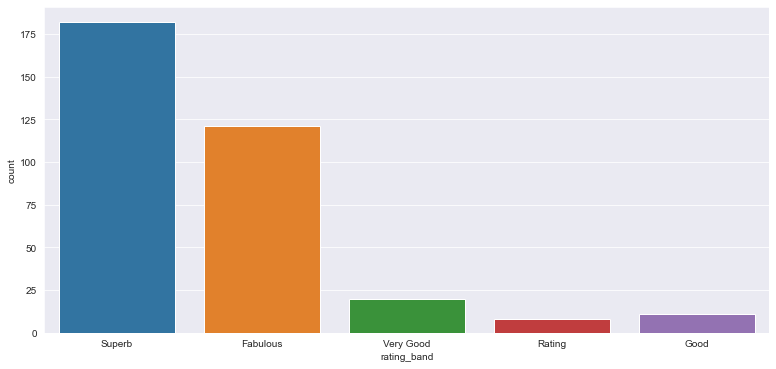

In [238]:
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='rating_band',data=df)

<AxesSubplot:xlabel='City', ylabel='count'>

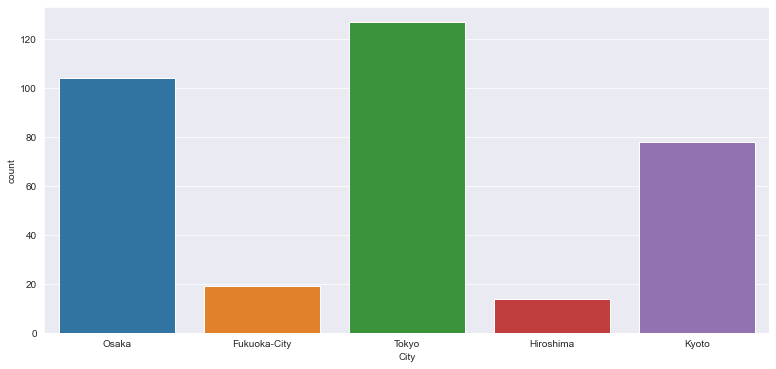

In [239]:
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
sns.countplot(x='City',data=df)

In [240]:
cities=df['hostel_name'].value_counts(ascending=False).sum()
cities

342

In [241]:
data=df.groupby('hostel_name')[['summary_score']].mean().sort_values('summary_score',ascending=False).head(20).index

<AxesSubplot:xlabel='summary_score', ylabel='hostel_name'>

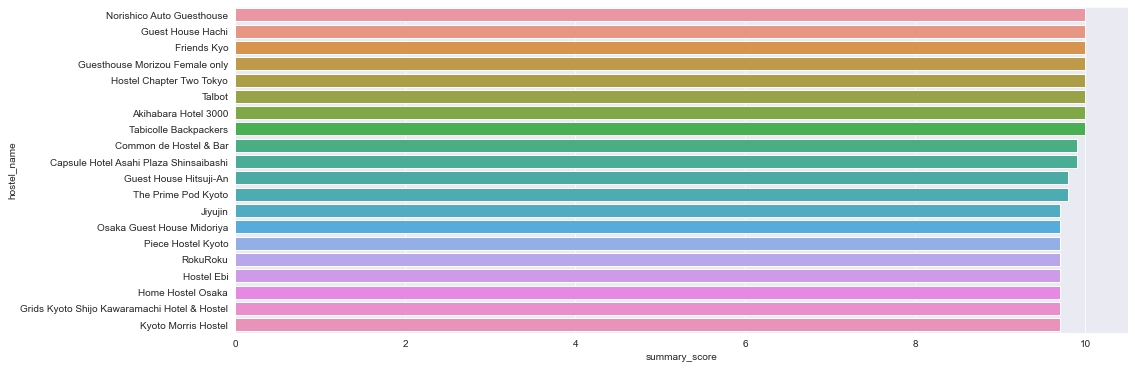

In [242]:
plt.figure(figsize=(16,6))
sns.barplot(y=df['hostel_name'],x=df['summary_score'],order=data)

<AxesSubplot:xlabel='price_from', ylabel='City'>

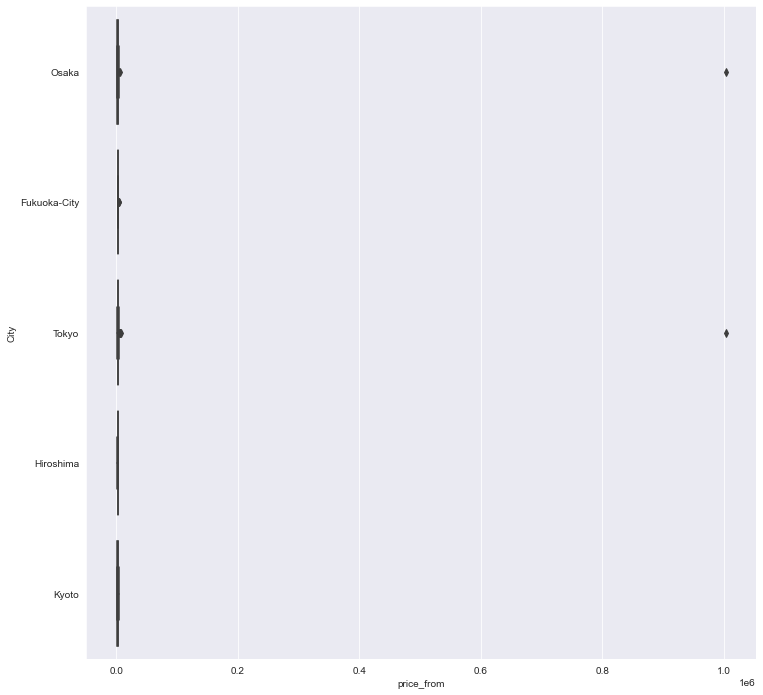

In [243]:
plt.figure(figsize=(12,12))
sns.boxplot(x='price_from',y='City',data=df)

In [244]:
df=df[df['price_from']!=1003200]

<AxesSubplot:xlabel='City', ylabel='price_from'>

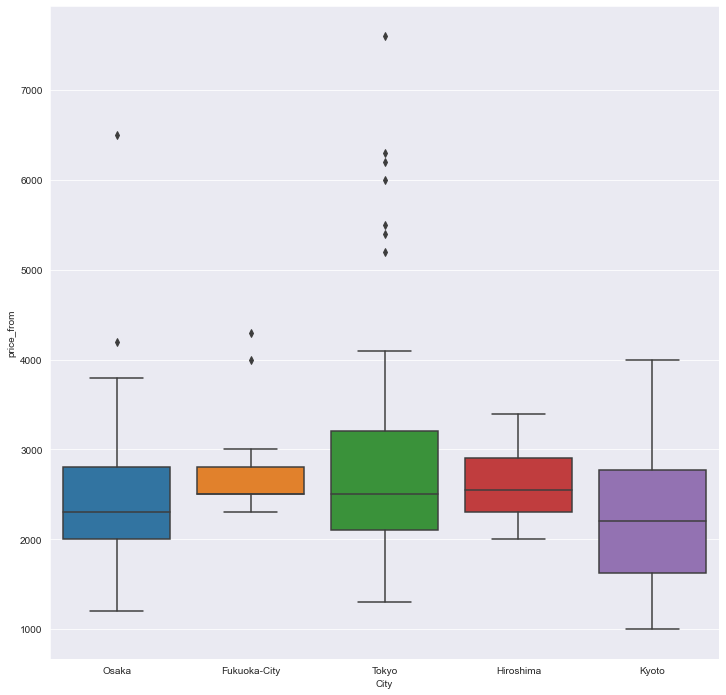

In [245]:
plt.figure(figsize=(12,12))
sns.boxplot(y='price_from',x='City',data=df)

In [246]:
data=df.groupby('hostel_name')[['summary_score']].mean().sort_values('summary_score',ascending=False).head(20).index

In [247]:
data=df.groupby(['hostel_name','City'])[['cleanliness']].mean().sort_values('cleanliness',ascending=False).head(20)
data

,,cleanliness
hostel_name,City,
Book And Bed Tokyo Fukuoka,Fukuoka-City,10.0
Capsule Hotel Asahi Plaza Shinsaibashi,Osaka,10.0
Lyuro Tokyo Kiyosumi -The Share Hotels-,Tokyo,10.0
R.Star Hostel Kyoto,Kyoto,10.0
Lucky's,Osaka,10.0
RokuRoku,Kyoto,10.0
Capsule Resort Kyoto Square,Kyoto,10.0
Capsule Inn Kinshichou,Tokyo,10.0
Guesthouse Morizou Female only,Osaka,10.0


In [248]:
data=df.groupby(['hostel_name','City'])[['security']].mean().sort_values('security',ascending=False).head(20)
data

,,security
hostel_name,City,
Guest House Shiori Ann,Kyoto,10.0
Norishico Auto Guesthouse,Fukuoka-City,10.0
Shibamata FU-TEN Bed and Local,Tokyo,10.0
Gojo Guesthouse - Annex,Kyoto,10.0
Guesthouse Shitamachi-Kujo,Kyoto,10.0
Hostel moku-moku,Osaka,10.0
Osaka International Youth Hostel,Osaka,10.0
Shin-Osaka Youth Hostel,Osaka,10.0
Bigtree Guesthouse,Osaka,10.0


In [249]:
data=df.groupby(['hostel_name','City'])[['staff']].mean().sort_values('staff',ascending=False).head(20)
data

,,staff
hostel_name,City,
Good Diner Inn Copain,Tokyo,10.0
Norishico Auto Guesthouse,Fukuoka-City,10.0
Guest House Onoya,Osaka,10.0
Bigtree Guesthouse,Osaka,10.0
OKI's Inn,Kyoto,10.0
Bonfire Hostel Osaka,Osaka,10.0
Tabicolle Backpackers,Fukuoka-City,10.0
Guest House Kaine,Fukuoka-City,10.0
Book And Bed Tokyo Fukuoka,Fukuoka-City,10.0


In [250]:
data=df.groupby(['hostel_name','City'])[['atmosphere']].mean().sort_values('atmosphere',ascending=False).head(20)
data

,,atmosphere
hostel_name,City,
RokuRoku,Kyoto,10.0
Talbot,Kyoto,10.0
Guesthouse Shitamachi-Kujo,Kyoto,10.0
Chaganjutei,Kyoto,10.0
Ikidane House Asakusa Hatago,Tokyo,10.0
Friends Kyo,Kyoto,10.0
Capsule Hotel Asahi Plaza Shinsaibashi,Osaka,10.0
Norishico Auto Guesthouse,Fukuoka-City,10.0
Osaka International Youth Hostel,Osaka,10.0


In [251]:
data=df.groupby(['hostel_name','City'])[['facilities']].mean().sort_values('facilities',ascending=False).head(20)
data

,,facilities
hostel_name,City,
Guest House Shiori Ann,Kyoto,10.0
Talbot,Kyoto,10.0
Norishico Auto Guesthouse,Fukuoka-City,10.0
Bonfire Hostel Osaka,Osaka,10.0
Capsule Hotel Asahi Plaza Shinsaibashi,Osaka,10.0
Jimbocho Sakura Hotel,Tokyo,10.0
Ikidane House Asakusa Hatago,Tokyo,10.0
Colours,Kyoto,10.0
Osaka International Youth Hostel,Osaka,10.0


In [252]:
data=df.groupby(['hostel_name','City'])[['price_from']].mean().sort_values('price_from',ascending=True).head(25)
data

,,price_from
hostel_name,City,
Downtown Inn Kyoto,Kyoto,1000.0
Peace House Suzunami,Osaka,1200.0
Peace House Showa,Osaka,1200.0
Ikidane House Namba,Osaka,1200.0
Peace House Sachi,Osaka,1200.0
Peace House Abeno,Osaka,1200.0
Peace House Sakura,Kyoto,1300.0
Hostel Ginkakuji,Kyoto,1300.0
Asakusa Hostel Toukaisou,Tokyo,1300.0


In [253]:
data=df.groupby(['hostel_name','City'])[['price_from']].mean().sort_values('price_from',ascending=False).head(25)
data

,,price_from
hostel_name,City,
Tadaima Japan Shinjuku Ryokan,Tokyo,7600.0
"Kaneyoshi Ryokan, Namba Dotombori",Osaka,6500.0
The Millennials Shibuya,Tokyo,6300.0
Capsule Hotel Anshin Oyado Akihabara,Tokyo,6200.0
Capsule Hotel Anshin Oyado Shinbashi,Tokyo,6000.0
Nadeshiko Hotel Shibuya (Female Only),Tokyo,5500.0
Turn Table Hostel,Tokyo,5400.0
WIRED HOTEL Asakusa,Tokyo,5200.0
Book And Bed Tokyo Fukuoka,Fukuoka-City,4300.0


In [254]:
df['new_distance']=df.Distance.str.extract(r"(\d+\.\d+)")
df['new_distance']

0       2.9
1       0.7
2       7.8
3       8.7
4      10.5
       ... 
337     2.6
338     2.9
339    17.5
340     2.4
341     5.9
Name: new_distance, Length: 340, dtype: object

In [255]:
df.new_distance.isna().sum()

32

In [256]:
df['new_distance'].median()

4.5

In [257]:
df.new_distance.fillna(4.5,inplace=True)

In [258]:
df.columns

Index(['Unnamed: 0', 'hostel_name', 'City', 'price_from', 'Distance',
       'summary_score', 'rating_band', 'atmosphere', 'cleanliness',
       'facilities', 'location.y', 'security', 'staff', 'valueformoney', 'lon',
       'lat', 'new_distance'],
      dtype='object')

In [259]:
data=df.groupby(['hostel_name','City'])[['new_distance']].mean().sort_values('new_distance',ascending=True).head(25)
data

,,new_distance
hostel_name,City,
Book And Bed Tokyo Fukuoka,Fukuoka-City,0.3
The Prime Pod Kyoto,Kyoto,0.4
Kyoto Morris Hostel,Kyoto,0.5
Piece Hostel Sanjo,Kyoto,0.5
Guest House YULULU,Kyoto,0.5
The Millennials Kyoto,Kyoto,0.5
HATAGO tenjin,Fukuoka-City,0.6
Comics & CapsuleHotel COMICAP kyotoshinkyogoku,Kyoto,0.7
& And Hostel,Fukuoka-City,0.7


In [260]:
data=df.groupby(['hostel_name','City'])[['new_distance']].mean().sort_values('new_distance',ascending=False).head(25)
data

,,new_distance
hostel_name,City,
Bigtree Guesthouse,Osaka,36.6
Talbot,Kyoto,29.5
Guesthouse Fujitatami,Osaka,26.6
Osaka International Youth Hostel,Osaka,20.3
Shibamata FU-TEN Bed and Local,Tokyo,18.5
Goen Lounge＆Stay,Osaka,18.2
Hotel&Hostel On the Marks Tokyo Kawasaki,Tokyo,18.1
YAWP! backpackers,Tokyo,17.5
J's Backpackers,Tokyo,16.6


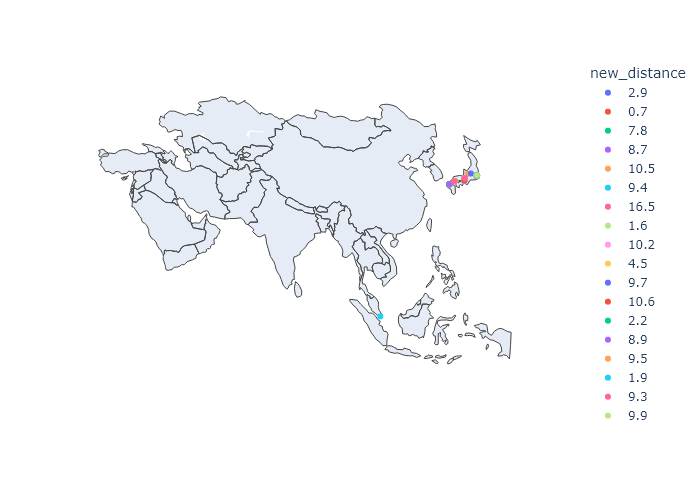

In [288]:
fig=px.scatter_geo(data_frame=df,
              lat='lat',
              lon='lon',
              hover_name='hostel_name',
              color='new_distance',
              projection="natural earth",
              scope='asia')
fig.show('png')

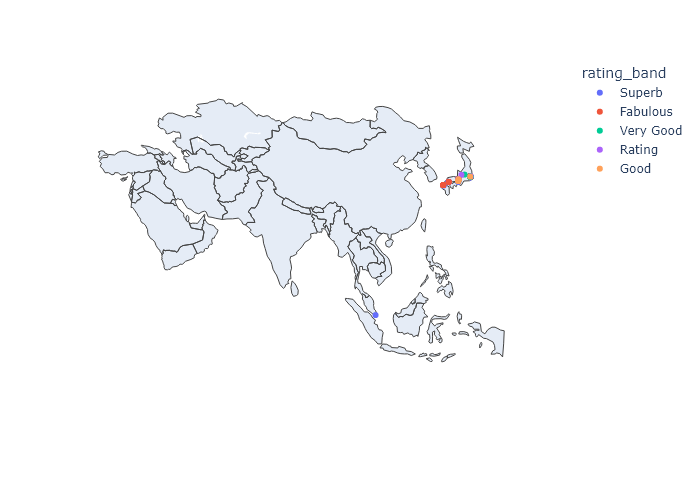

In [289]:
fig = px.scatter_geo(df, lat='lat', lon='lon', hover_name='hostel_name', 
                     color='rating_band', projection="natural earth",scope='asia')
fig.show('png')

In [264]:
df_copy=df.copy()
df_copy.head()

,Unnamed: 0,hostel_name,City,price_from,Distance,summary_score,rating_band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat,new_distance
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678,2.9
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN,0.7
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447,7.8
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716,8.7
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898,10.5


In [265]:
each_city = pd.get_dummies(df_copy['City'])
rating = pd.get_dummies(df_copy['rating_band'])

In [266]:
df_copy=df_copy.drop(['Unnamed: 0','hostel_name','City','Distance','rating_band','lon','lat'],axis=1)

In [267]:
df_copy = pd.concat([df_copy, each_city, rating], axis=1)


<AxesSubplot:>

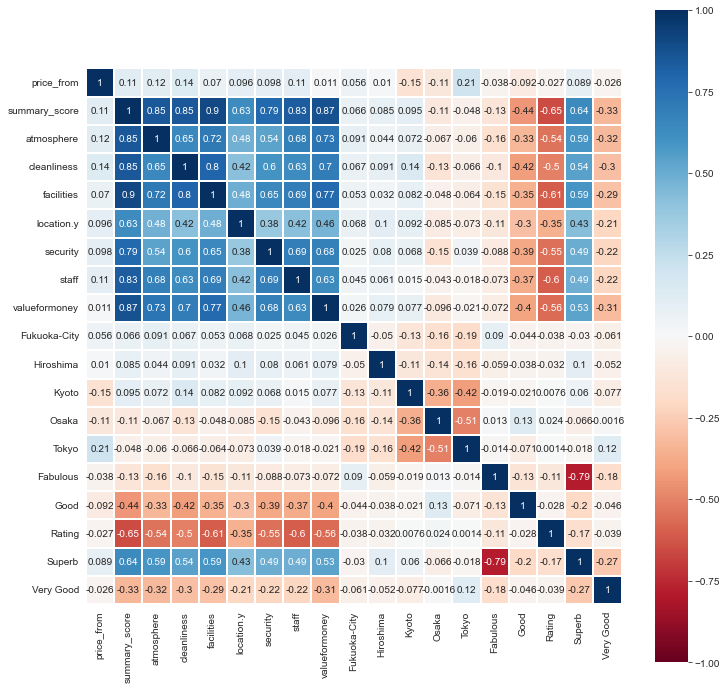

In [268]:
plt.figure(figsize=(12,12))
sns.heatmap(df_copy.corr(),annot=True, center=0, square=True, linewidths=0.1, vmax=1.0,vmin=-1,linecolor='white', cmap="RdBu")

In [273]:
features = df_copy.columns.to_list()
features.remove('price_from')

In [287]:
from scipy import stats

def describe_feats_grouped_by_price_from(feature):
    
    t_stat, pval = get_ttest_results(feature)
    if round(pval, 2) <= 0.05:
        print(f'{feature} analysis: ')
        print(df_copy.groupby('price_from')[feature].describe())
        print(f'T-Statistic: {t_stat}, P-val: {pval:.2f}')
    else:
        print(f'{feature} is not statistically significant to predict the price_from')
    print('=======================================')
    
def get_ttest_results(feature):    
    group_1 = df_copy[df_copy['price_from'] == 0][feature]
    group_2 = df_copy[df_copy['price_from'] == 1][feature]
    t_stat, pval = stats.ttest_ind(group_1, group_2, equal_var=False)
    return t_stat, pval
    
    
for feat in list(df_copy.drop('price_from', axis=1).columns):
    describe_feats_grouped_by_price_from(feat)

summary_score is not statistically significant to predict the price_from
atmosphere is not statistically significant to predict the price_from
cleanliness is not statistically significant to predict the price_from
facilities is not statistically significant to predict the price_from
location.y is not statistically significant to predict the price_from
security is not statistically significant to predict the price_from
staff is not statistically significant to predict the price_from
valueformoney is not statistically significant to predict the price_from
new_distance is not statistically significant to predict the price_from
Fukuoka-City is not statistically significant to predict the price_from
Hiroshima is not statistically significant to predict the price_from
Kyoto is not statistically significant to predict the price_from
Osaka is not statistically significant to predict the price_from
Tokyo is not statistically significant to predict the price_from
Fabulous is not statistically si